In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/My Drive/open_iit_data/'

/content/drive/My Drive/open_iit_data


In [3]:
import pickle
import tensorflow as tf
import pandas as pd

In [8]:
df1 = pd.read_csv('LSTMPREDICT.csv')
df2 = pd.read_csv('xgboost_output2.csv')


In [9]:
df1.head(10)

,Unnamed: 0,0
0,0,395333.66
1,1,400186.06
2,2,407702.75
3,3,376493.62
4,4,367236.70
5,5,404886.06
6,6,407025.84
7,7,430863.00
8,8,428691.50
9,9,417885.88


In [10]:
df2.head(10)

,Unnamed: 0,0
0,0,401870.405908
1,1,445106.632081
2,2,444142.702685
3,3,399304.333230
4,4,420331.816918
5,5,424658.433504
6,6,436625.632452
7,7,415393.792936
8,8,455531.531183
9,9,378203.326591


In [12]:
df2.columns

Index(['Unnamed: 0', '0'], dtype='object')

In [13]:
df2['LSTM'] = df1['0']

In [14]:
df2.head()

,Unnamed: 0,0,LSTM
0,0,401870.405908,395333.66
1,1,445106.632081,400186.06
2,2,444142.702685,407702.75
3,3,399304.333230,376493.62
4,4,420331.816918,367236.70


In [137]:
df=pd.read_csv('Final_whole_data.csv')
df['Pilgrims'] = df['Pilgrims'].shift(-1)
df = df.drop(df.index[-1])

In [163]:
temp = df.iloc[-53 , :]
temp

helper                             466
Date                        25-09-2022
tirupati rooms                      48
tirupati temple history             34
ttd                                 26
venkateswara yt                     40
venkateswara swamy                  44
tirupati darshan timings            29
tirumala                            68
train to tirupati                   34
tirupati                            74
tirupati train                      73
kanipakam                           46
tirupati distance                   70
kalahasti                           39
Pilgrims                      524357.0
Name: 466, dtype: object

In [150]:
dates = df['Date']
dates = pd.to_datetime(dates , format = '%d-%m-%Y')

In [151]:
dates.head()

0   2013-10-20
1   2013-10-27
2   2013-11-03
3   2013-11-10
4   2013-11-17
Name: Date, dtype: datetime64[ns]

In [ ]:
dates.head()

In [16]:
df2['Pilgrims'] = df['Pilgrims']

In [17]:
df2

,Unnamed: 0,0,LSTM,Pilgrims
0,0,401870.405908,395333.66,363223.0
1,1,445106.632081,400186.06,425182.0
2,2,444142.702685,407702.75,406690.0
3,3,399304.333230,376493.62,378546.0
4,4,420331.816918,367236.70,378180.0
...,...,...,...,...
514,514,484742.813499,491212.03,514367.0
515,515,477490.558296,502145.12,478997.0
516,516,459564.220048,483305.60,474883.0
517,517,452574.390093,482317.80,490777.0


In [18]:
df2.rename(columns = {'0' : 'Xgboost'} , inplace = True)

In [19]:
df2.drop(columns = ['Unnamed: 0'] , inplace = True)

In [20]:
df2.head()

,Xgboost,LSTM,Pilgrims
0,401870.405908,395333.66,363223.0
1,445106.632081,400186.06,425182.0
2,444142.702685,407702.75,406690.0
3,399304.333230,376493.62,378546.0
4,420331.816918,367236.70,378180.0


In [ ]:
#df2['mean'] = (df2['Xgboost'] + df2['LSTM'])/2

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [22]:
x = df2.drop(columns = ['Pilgrims'])
y = df2['Pilgrims']

In [ ]:
df2.head()

In [23]:
x=x.to_numpy()
y=y.to_numpy()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.1, random_state=10)

In [165]:
y_test

array([500190.    , 427974.    , 579191.    , 193000.1684, 450238.    ,
       548135.    , 467543.    , 454138.    , 531707.    , 525810.    ,
       472918.    , 585893.    , 434584.    , 501308.    , 151221.    ,
       553426.    , 533609.    , 505417.    , 497774.    , 482842.    ,
       164884.    , 495935.    , 392694.    , 586208.    , 534746.    ,
       390455.    , 309363.    , 462562.    , 123847.    , 499522.    ,
       475051.    , 473998.    , 366799.    , 500093.    ,  81111.    ,
       260725.3895, 106370.    , 528810.    , 372129.    , 534044.    ,
       243794.0842, 521478.    , 480630.    , 466644.    , 197639.    ,
       490777.    , 531933.    , 250777.    , 435714.    , 341855.    ,
       559098.    , 487002.    ])

In [25]:
reg = LinearRegression().fit(X_train, y_train)

In [26]:
y_pred = reg.predict(X_test)

In [27]:
mean_absolute_percentage_error(y_pred, y_test)

0.0843244142850487

In [28]:
reg.coef_

array([0.56217596, 0.46726677])

In [29]:
y_original = reg.predict(x)

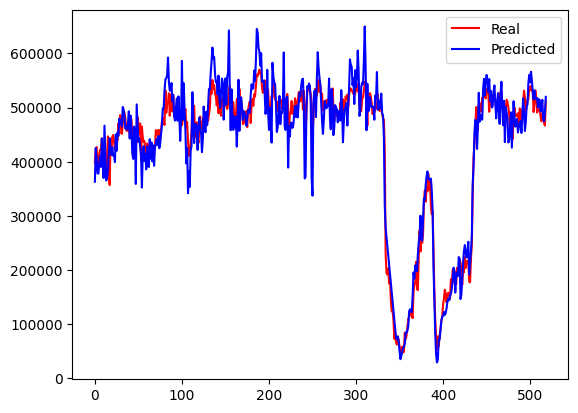

In [31]:
plt.plot(y_original, color='red',label='Real')
plt.plot(y, color='blue',label='Predicted')
plt.legend()
plt.show()

In [152]:
import plotly.graph_objects as go

# Create a Plotly figure
fig = go.Figure()

# Add the real data trace with a transparent red line
fig.add_trace(go.Scatter(x = dates , y=y_original, mode='lines', line=dict(color='rgba(255, 0, 0, 0.5)', width=2, dash='solid'), name='Real'))

# Add the predicted data trace with a transparent blue line
fig.add_trace(go.Scatter(x = dates ,y=y, mode='lines', line=dict(color='rgba(0, 0, 255, 0.5)', width=2, dash='solid'), name='Predicted'))

# Add a legend
fig.update_layout(showlegend=True)

# Show the Plotly figure
fig.show()

In [133]:
dfy=pd.DataFrame(y_original)
dfy.to_csv("y_original.csv")

In [134]:
dfy=pd.DataFrame(y)
dfy.to_csv("y.csv")

In [41]:
import pickle

In [42]:
filename = 'Linear_regression.sav'

In [43]:
pickle.dump(reg , open(filename , 'wb'))